In [1]:
import os
os.chdir("../")

In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from src.dataset import load_dataset

/home/gormat/Documents/ct-images-augmentation/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = load_dataset("/ravana/d3d_work/micorl/data/ct_images_prostate_32fixed/")

Loading dataset: 100%|██████████| 28/28 [00:08<00:00,  3.45it/s]


In [4]:
import torch
from torch.utils.data import DataLoader

In [66]:
train_loader = DataLoader(
    dataset,
    batch_size=3,
    num_workers=8,
    shuffle=True,
    pin_memory=torch.cuda.is_available(),
    )
        # 

In [6]:
real_batch = next(iter(train_loader))

In [7]:
real_batch.shape

torch.Size([2, 1, 256, 256, 32])

In [8]:
real_batch[0].shape

torch.Size([1, 256, 256, 32])

In [9]:
from src.utils import plot_dicom

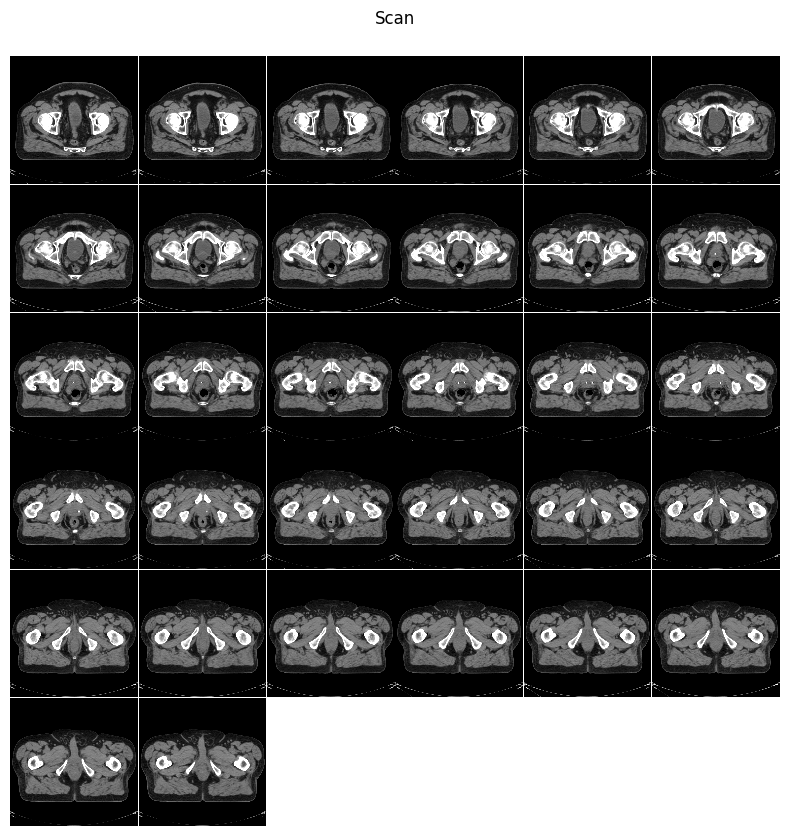

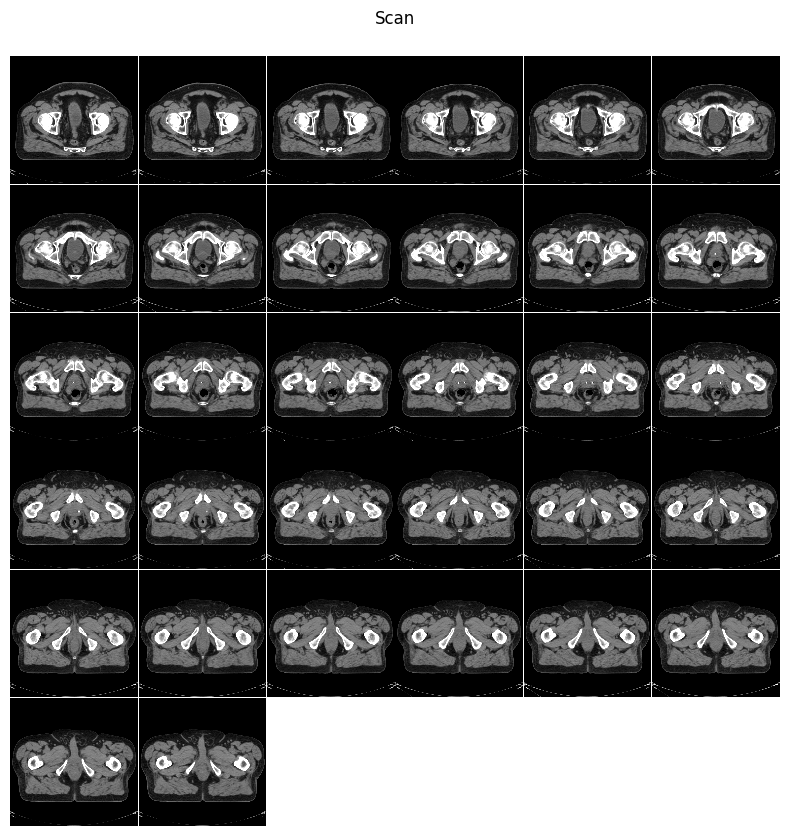

In [10]:
plot_dicom(real_batch[0][0])

In [132]:
from src.models.mini_gan import Generator, Discriminator, GAN, ModelParameters

In [133]:
real_batch[0].shape

torch.Size([1, 256, 256, 32])

In [134]:
nz = 100 # latent space = length of random vector passed to generator
gen = Generator(img_shape=(1,256,256,32),latent_dim=nz).to("cuda")

In [135]:
print(gen)
device = "cuda"

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): BatchNorm1d(256, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Linear(in_features=256, out_features=2097152, bias=True)
    (6): Sigmoid()
  )
)


In [136]:
# fixed_noise = torch.randn(64, nz, 1, 1, device=device)
fixed_noise = torch.randn(64, nz, device=device)


In [137]:
real_batch[0].max()

metatensor(1.)

In [138]:
fixed_noise.view(-1, nz).shape

torch.Size([64, 100])

In [139]:
gen(fixed_noise)

tensor([[[[[0.4695, 0.4636, 0.5097,  ..., 0.5185, 0.4909, 0.5049],
           [0.4799, 0.4753, 0.4845,  ..., 0.4863, 0.4800, 0.5271],
           [0.5368, 0.5247, 0.5324,  ..., 0.4532, 0.4582, 0.5132],
           ...,
           [0.4662, 0.4864, 0.4886,  ..., 0.4880, 0.5100, 0.5024],
           [0.4897, 0.5656, 0.4618,  ..., 0.5279, 0.5423, 0.4176],
           [0.5025, 0.5041, 0.4848,  ..., 0.5360, 0.4565, 0.4737]],

          [[0.4848, 0.4847, 0.4649,  ..., 0.3961, 0.4842, 0.4854],
           [0.5149, 0.5262, 0.4724,  ..., 0.5514, 0.4806, 0.5044],
           [0.5145, 0.5509, 0.5131,  ..., 0.4866, 0.5052, 0.5337],
           ...,
           [0.5047, 0.5073, 0.4568,  ..., 0.4992, 0.5225, 0.5363],
           [0.5024, 0.4796, 0.4984,  ..., 0.4550, 0.4803, 0.4629],
           [0.5004, 0.5119, 0.5146,  ..., 0.5166, 0.5150, 0.5451]],

          [[0.5251, 0.4961, 0.5165,  ..., 0.4676, 0.4828, 0.4710],
           [0.5175, 0.5118, 0.4440,  ..., 0.4817, 0.4974, 0.4705],
           [0.4517, 0.4882

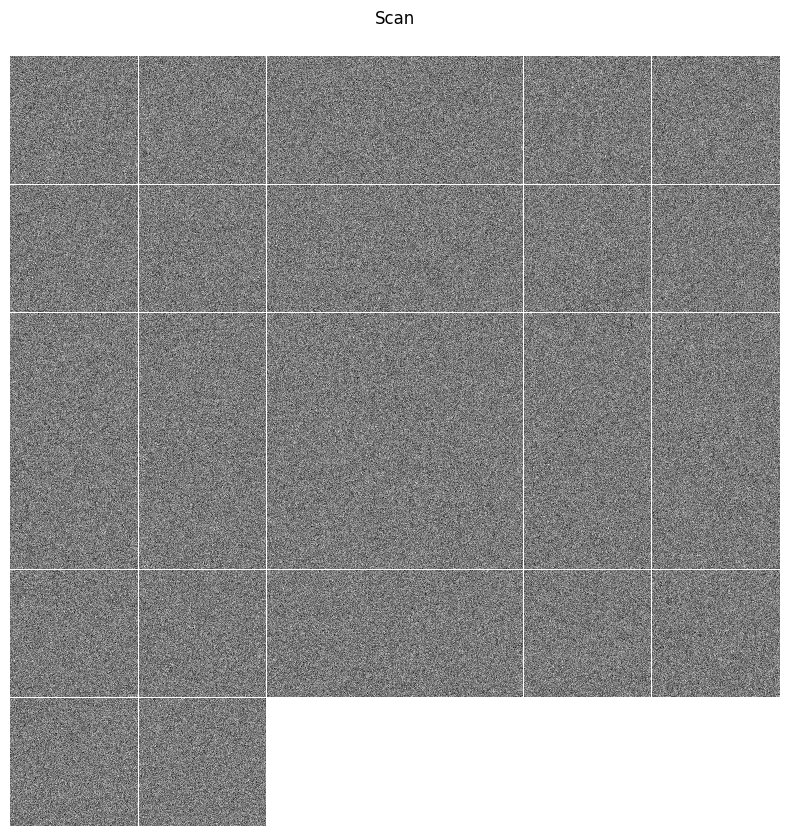

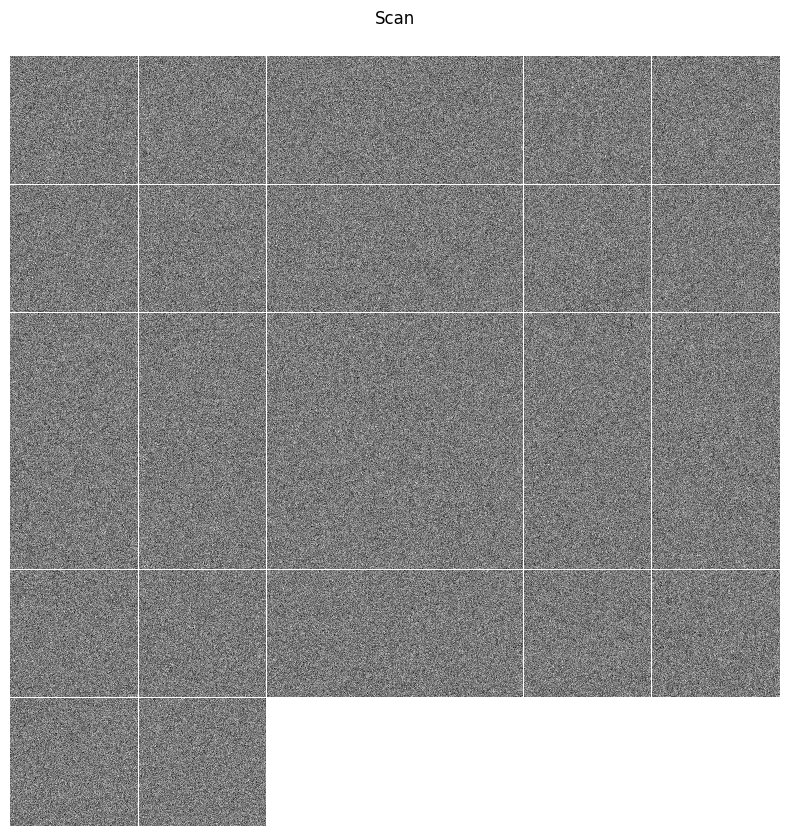

In [140]:
plot_dicom(gen(fixed_noise)[0].detach().cpu())

In [141]:
mp = ModelParameters(0.0002, real_batch[0].shape, 100, 0.5, 0.99, "cuda")

In [142]:
gan = GAN(mp)

In [143]:
gan(fixed_noise.to("cpu"))

tensor([[[[[0.4825, 0.5178, 0.5178,  ..., 0.4982, 0.5006, 0.4817],
           [0.5161, 0.4670, 0.5108,  ..., 0.5220, 0.5174, 0.4811],
           [0.5238, 0.4917, 0.5226,  ..., 0.4984, 0.5085, 0.5428],
           ...,
           [0.5337, 0.5411, 0.5262,  ..., 0.5047, 0.4881, 0.4644],
           [0.4944, 0.5241, 0.4626,  ..., 0.4849, 0.4678, 0.5229],
           [0.4883, 0.5437, 0.4906,  ..., 0.4974, 0.4970, 0.4741]],

          [[0.4989, 0.5200, 0.5059,  ..., 0.4802, 0.4902, 0.5440],
           [0.4795, 0.4825, 0.5149,  ..., 0.5138, 0.4467, 0.4947],
           [0.4632, 0.5346, 0.4762,  ..., 0.5139, 0.4652, 0.5223],
           ...,
           [0.4832, 0.5563, 0.5025,  ..., 0.4809, 0.4618, 0.5133],
           [0.4958, 0.4714, 0.5111,  ..., 0.4967, 0.4935, 0.4750],
           [0.4935, 0.4601, 0.5051,  ..., 0.5498, 0.4882, 0.5314]],

          [[0.5216, 0.5368, 0.4483,  ..., 0.5044, 0.4848, 0.4911],
           [0.4894, 0.5605, 0.4522,  ..., 0.5272, 0.4924, 0.4844],
           [0.5250, 0.4726

In [144]:
for batch_idx, imgs in enumerate(train_loader):
        # sample noise
    print(imgs.shape)
    z = torch.randn(imgs.shape[0], 100)
    z = z.type_as(imgs)
    print(z.shape)
    # print(sample[0].shape)
    break


KeyboardInterrupt: 

In [ ]:
generated_imgs = gen(fixed_noise)

In [ ]:
generated_imgs[:6].shape

torch.Size([6, 1, 256, 256, 32])

In [149]:
generated_imgs.squeeze().shape

torch.Size([64, 256, 256, 32])

In [145]:
import pytorch_lightning as pl

In [147]:
trainer = pl.Trainer(
    accelerator="auto",
    devices=1,
    max_epochs=5,
)
trainer.fit(gan, train_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]



  | Name          | Type          | Params | In sizes | Out sizes           
----------------------------------------------------------------------------------
0 | generator     | Generator     | 539 M  | [2, 100] | [2, 1, 256, 256, 32]
1 | discriminator | Discriminator | 1.1 B  | ?        | ?                   
2 | criterion     | BCELoss       | 0      | ?        | ?                   
----------------------------------------------------------------------------------
1.6 B     Trainable params
0         Non-trainable params
1.6 B     Total params
6,451.554 Total estimated model params size (MB)
/home/gormat/Documents/ct-images-augmentation/.venv/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (10) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 0:   0%|          | 0/10 [00:00<?, ?it/s] 

/home/gormat/Documents/ct-images-augmentation/.venv/lib/python3.10/site-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [151]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs/

Launching TensorBoard...